# Import necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(7)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load and explore the data

In [2]:
from keras.datasets import boston_housing

(trainX, trainY), (testX, testY) = boston_housing.load_data()

In [6]:
# take a look at the data
print(trainX[0])
print(trainY[0])


print(f'Training data : {trainX.shape}')
print(f'Test data : {testX.shape}')

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2
Training data : (404, 13)
Test data : (102, 13)


In [7]:
print(f'Training sample : {trainX[0]}')

Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [8]:
print(f'Training target sample : {trainY[0]}')

Training target sample : 15.2


# Prepare training and testing data

In [9]:
mean = trainX.mean(axis=0)
trainX -= mean
std = trainX.std(axis=0)
trainX /= std

testX -= mean
testX /= std

In [10]:
# take a look at the data
print(trainX[0])
print(trainY[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


# Create a model

In [11]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
          loss='mse',
          metrics=['mae'])


# Compile the model

In [15]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model

In [16]:
# Fit the model
H = model.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(testX, testY))

Train on 404 samples, validate on 102 samples
Epoch 1/10
404/404 [==============================] - 0s 593us/step - loss: 13.7438 - mean_squared_error: 13.7438 - val_loss: 23.4961 - val_mean_squared_error: 23.4961
Epoch 2/10
404/404 [==============================] - 0s 91us/step - loss: 12.6115 - mean_squared_error: 12.6115 - val_loss: 24.3256 - val_mean_squared_error: 24.3256
Epoch 3/10
404/404 [==============================] - 0s 110us/step - loss: 11.7240 - mean_squared_error: 11.7240 - val_loss: 23.6560 - val_mean_squared_error: 23.6560
Epoch 4/10
404/404 [==============================] - 0s 103us/step - loss: 11.0774 - mean_squared_error: 11.0774 - val_loss: 23.0308 - val_mean_squared_error: 23.0308
Epoch 5/10
404/404 [==============================] - 0s 99us/step - loss: 10.4954 - mean_squared_error: 10.4954 - val_loss: 22.2870 - val_mean_squared_error: 22.2870
Epoch 6/10
404/404 [==============================] - 0s 92us/step - loss: 10.3518 - mean_squared_error: 10.3518 - v

# Evaluate the results

In [17]:
# evaluate the model : train
scores = model.evaluate(trainX, trainY)
print(scores)

# # evaluate the model : test
scores = model.evaluate(testX, testY)
print(scores)

404/404 [==============================] - 0s 15us/step
[8.713472489083168, 8.713472489083168]
102/102 [==============================] - 0s 21us/step
[22.16711036831725, 22.16711036831725]


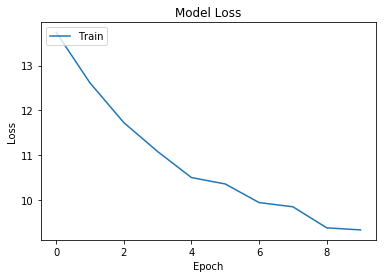

In [18]:
# Plot training & validation accuracy values
plt.plot(H.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [19]:
predictions = model.predict(trainX)
# round prediction
# rounded = [round(x[0]) for x in predictions]
print(predictions[0])


#code to compare actual and predictions for some unclosed dataset

[15.522495]
